In [16]:

import pandas as pd
import numpy as np

In [18]:
#read the data
df= pd.read_csv("E:\insideAIML\ML\cell_samples.csv") 


In [19]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [23]:
df.drop(["ID" , "BareNuc"]  , axis=1 , inplace=True)

In [40]:
x = df.drop(["Class"] , axis=1).values

In [41]:
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [42]:
y= df["Class"].values

In [43]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9714285714285714

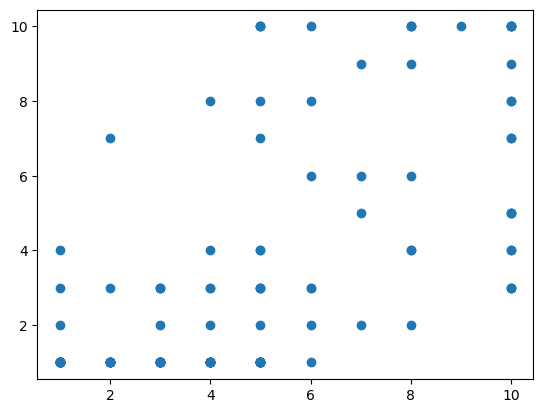

In [51]:
import matplotlib.pyplot as plt 
plt.scatter(x_test[:,0],x_test[:,1])

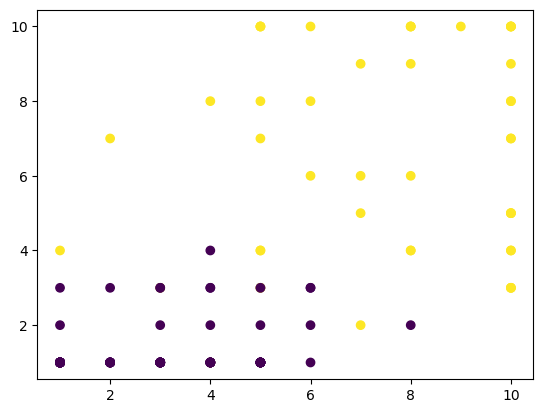

In [53]:
plt.scatter(x_test[:,0],x_test[:,1]  , c = y_test)

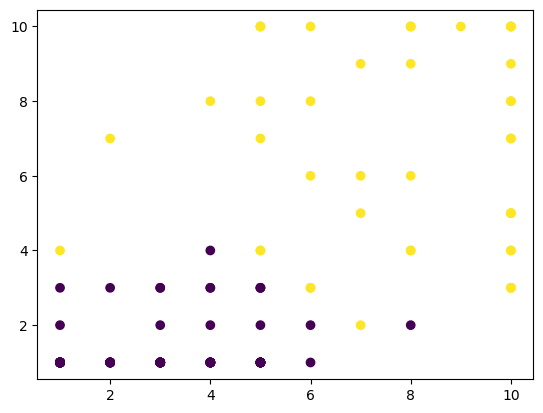

In [55]:
plt.scatter(x_test[:,0],x_test[:,1]  , c = y_pred)

# PCA for Classifiacation 

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca  =PCA(n_components=2)

In [58]:
pca.fit_transform(x)

array([[-3.71280495, -1.7370418 ],
       [ 2.21082554,  0.42225314],
       [-4.37020114, -0.01835741],
       ...,
       [11.80155948,  1.50292521],
       [ 6.94769476,  2.01065691],
       [ 7.6546889 ,  1.97052609]])

In [59]:
x_new  =pca.fit_transform(x)

In [66]:
x_new

array([[-3.71280495, -1.7370418 ],
       [ 2.21082554,  0.42225314],
       [-4.37020114, -0.01835741],
       ...,
       [11.80155948,  1.50292521],
       [ 6.94769476,  2.01065691],
       [ 7.6546889 ,  1.97052609]])

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=50)
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9714285714285714

#we get same accusracy by reducing col 

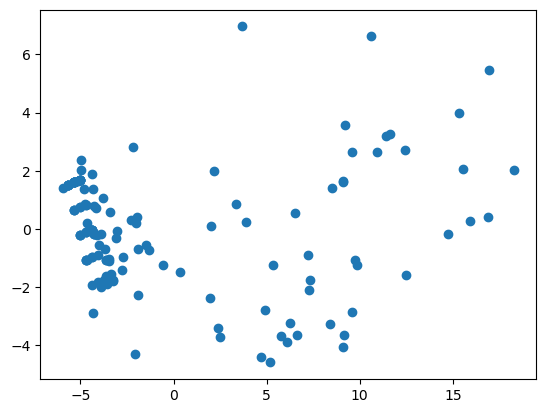

In [68]:

plt.scatter(x_test[:,0],x_test[:,1])

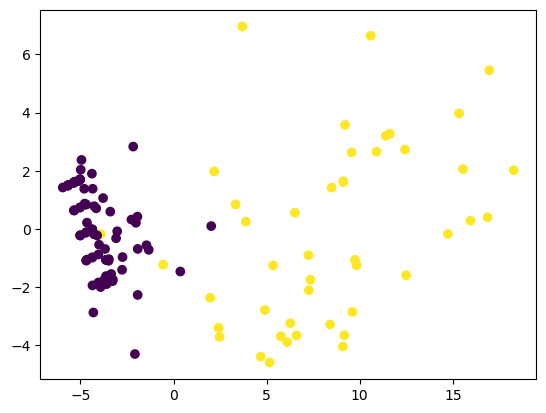

In [69]:

plt.scatter(x_test[:,0],x_test[:,1]  , c =y_test)

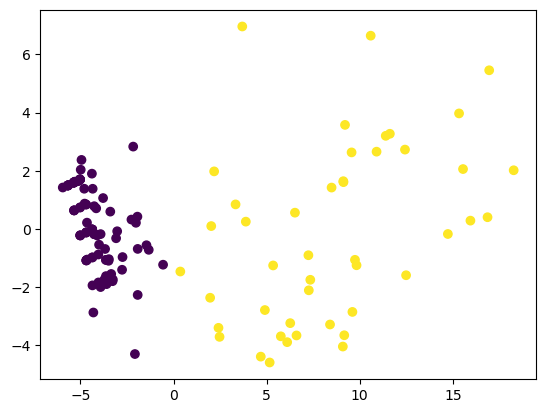

In [70]:
plt.scatter(x_test[:,0],x_test[:,1]  , c =y_pred)

In [ ]:
df=pd.read_csv("E:\insideAIML\ML\drug200.csv")